Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

Loading the Dataset

In [2]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


df.info() provides details about the DataFrame's columns, data types, memory usage, and non-null values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


df.describe() provides information such as the mean, standard deviation, minimum, maximum, and various percentiles for each numeric column in the DataFrame.

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Finding the count of null values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Total Charges should be numeric amount. Let's convert it to numerical data type

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

After converting 'TotalCharges' to numeric, 11 null values found in the dataset.

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there are 11 missing values in TotalCharges column. Filling those rows using ffill method

In [8]:
df.TotalCharges.fillna(method = 'ffill',inplace = True)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 Original dataframe 'df' assigned it to a new DataFrame df_a. This can be useful when we want to work with a copy of the original DataFrame without modifying the original data.

In [10]:
df_a = df.copy()
df_a.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


No     5174
Yes    1869
Name: Churn, dtype: int64

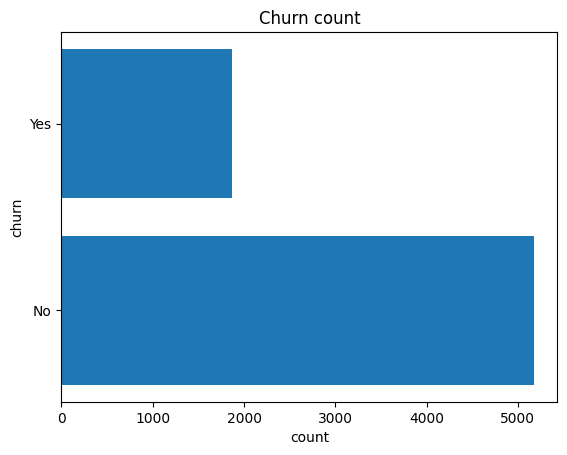

In [11]:
churn_data = df_a.Churn.value_counts()
plt.barh(churn_data.index,churn_data.values)
plt.xlabel("count")
plt.ylabel("churn")
plt.title("Churn count")
churn_data

I've  calculated the value counts of the "Churn" column using bar graph.

As we see Churn Data is highly imbalanced. Balancing the data by sampling methods

In [12]:
from sklearn.utils import resample
majority_class = df_a[df_a['Churn'] == 'No']
minority_class = df_a[df_a['Churn'] == 'Yes']
majority_downsampled = resample(majority_class,replace='Yes',n_samples=len(minority_class),random_state=42)
balanced_data = pd.concat([majority_downsampled, minority_class])
balanced_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1162,9359-UGBTK,Female,0,No,No,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),72.35,4991.50,No
5115,6374-AFWOX,Male,0,Yes,No,46,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Mailed check,65.65,3047.15,No
4193,2428-ZMCTB,Male,0,No,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.75,208.25,No
617,7134-MJPDY,Female,1,No,No,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),102.85,6976.75,No
6015,2325-NBPZG,Female,0,No,No,3,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.55,233.65,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


 Resampling is used to balance the class distribution and improve the model's performance on the minority class.
 By performing this resampling technique, I have created a balanced dataset (balanced_data) with an equal number of samples for each class.

In [13]:
balanced_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Dropping the column 'CustomerId' from the balanced_data dataset

In [14]:
balanced_data.drop('customerID',axis=1,inplace = True)

Performing label encoding on the categorical columns of the balanced dataset (balanced_data).
 Label encoding is a preprocessing technique that converts categorical values into numerical values, which is often required for machine learning algorithms.

In [15]:

from sklearn.preprocessing import LabelEncoder

# Separate numerical and categorical columns
numerical_columns = balanced_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = balanced_data.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_columns:
    balanced_data[col] = label_encoder.fit_transform(balanced_data[col])
balanced_data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1162,0,0,0,0,67,1,0,0,2,0,2,2,0,2,1,1,0,72.35,4991.50,0
5115,1,0,1,0,46,1,0,0,2,2,2,2,0,0,2,0,3,65.65,3047.15,0
4193,1,0,0,0,10,1,0,2,1,1,1,1,1,1,0,0,1,19.75,208.25,0
617,0,1,0,0,66,1,2,1,0,0,2,2,2,2,1,1,1,102.85,6976.75,0
6015,0,0,0,0,3,1,0,1,2,0,0,0,0,0,0,1,2,74.55,233.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,727.80,1
7026,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35,1
7032,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,75.75,1
7034,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,6886.25,1


**1.Customer Churn Prediction:** Build a predictive model to identify customers who are likely to churn in the future based on historical data.

Prediction using Logistic Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Separate features and target variable
X = balanced_data.drop('Churn', axis=1)  # Using 'Churn' as the target column
y = balanced_data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7727272727272727
Confusion Matrix:
 [[282  97]
 [ 73 296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       379
           1       0.75      0.80      0.78       369

    accuracy                           0.77       748
   macro avg       0.77      0.77      0.77       748
weighted avg       0.77      0.77      0.77       748



Accuracy: The accuracy of the model on the test set is approximately 0.773, or 77.3%.

Prediction using  Gradient Boosting classifier

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and target variable
X = balanced_data.drop('Churn', axis=1)  # Using 'Churn' as the target column
y = balanced_data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7807486631016043
Confusion Matrix:
 [[284  95]
 [ 69 300]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       379
           1       0.76      0.81      0.79       369

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



Prediction using RandomForestClassifier

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Separate features and target variable
X = balanced_data.drop('Churn', axis=1)  # Using 'Churn' as the target column
y = balanced_data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7901069518716578
Confusion Matrix:
 [[298  81]
 [ 76 293]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       379
           1       0.78      0.79      0.79       369

    accuracy                           0.79       748
   macro avg       0.79      0.79      0.79       748
weighted avg       0.79      0.79      0.79       748



Accuracy: The accuracy of the model on the test set is approximately 0.79, or 79%.


**2.Customer Segmentation:** Segment customers based on their characteristics (e.g., gender, SeniorCitizen, Partner) to better understand their behavior.

Segmenting customers based on their characteristics is done using K-Means clustering. This technique allows us to group customers with similar attributes together.

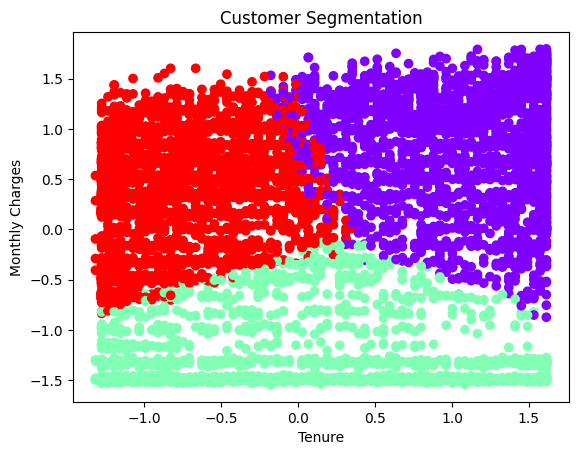

   customerID  gender  SeniorCitizen  Partner Dependents    tenure  \
0  7590-VHVEG       0              0        1         No -1.277354   
1  5575-GNVDE       1              0        0         No  0.066323   
2  3668-QPYBK       1              0        0         No -1.236636   
3  7795-CFOCW       1              0        0         No  0.514215   
4  9237-HQITU       0              0        0         No -1.236636   

  PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0           No  No phone service             DSL             No  ...   
1          Yes                No             DSL            Yes  ...   
2          Yes                No             DSL            Yes  ...   
3           No  No phone service             DSL            Yes  ...   
4          Yes                No     Fiber optic             No  ...   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month           

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Convert categorical data to numerical using label encoding
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'SeniorCitizen', 'Partner']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Standardize numerical column
numerical_columns = ['tenure', 'MonthlyCharges']
df[numerical_columns] = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()

# Perform K-Means clustering
X = df[['gender', 'SeniorCitizen', 'Partner', 'tenure', 'MonthlyCharges']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(df['tenure'], df['MonthlyCharges'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title('Customer Segmentation')
plt.show()

# Display the first few rows of the segmented dataset
print(df.head())


Based on the scatter plot, we can see how customers are grouped into clusters based on their tenure and monthly charges.

**3.Service Usage Analysis:** Analyze how customers use different services (e.g., PhoneService, InternetService, StreamingTV) and its impact on churn.

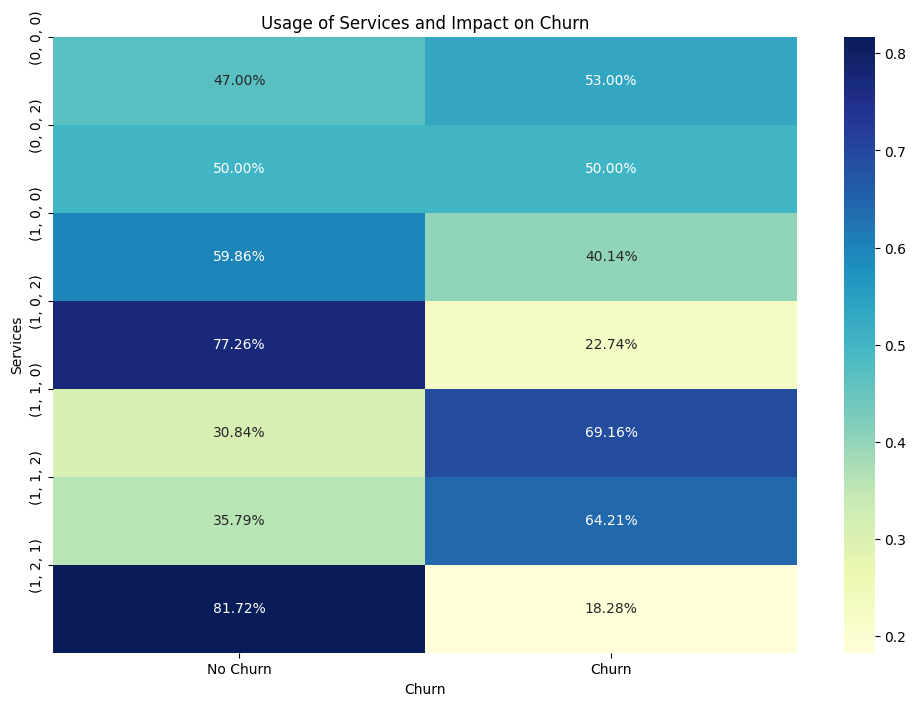

In [20]:
# Create a subset of columns for analysis
columns_of_interest = ['PhoneService', 'InternetService', 'StreamingTV', 'Churn']
subset_df = balanced_data[columns_of_interest]

# Count the occurrences of each service usage and churn status
service_counts = subset_df.groupby(['PhoneService', 'InternetService', 'StreamingTV', 'Churn']).size().reset_index(name='Count')

# Pivot the data for visualization
pivot_df = service_counts.pivot_table(index=['PhoneService', 'InternetService', 'StreamingTV'], columns='Churn', values='Count', fill_value=0)

# Normalize the values to see the proportions
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Visualize the usage of services and its impact on churn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt=".2%", cbar=True)
plt.title('Usage of Services and Impact on Churn')
plt.xlabel('Churn')
plt.ylabel('Services')
plt.xticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'])
plt.yticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index)
plt.show()

The heatmap visualization provides how different services (PhoneService, InternetService, StreamingTV) impact churn.
Customers with PhoneService seem to have a relatively lower churn rate compared to those without PhoneService.
Fiber optic InternetService users have a higher churn rate compared to DSL users. This suggests that customers with Fiber optic InternetService might be more likely to churn.
Customers who do not have StreamingTV service (regardless of InternetService type) appear to have a slightly higher churn rate.

**4.	Contract Analysis:** Study the effect of contract types (e.g., month-to-month, one year, two years) on customer churn.

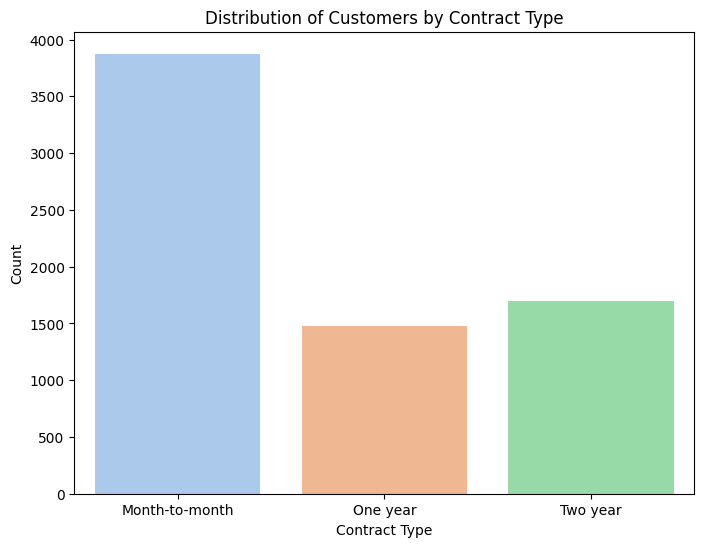

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=df, palette='pastel')
plt.title('Distribution of Customers by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

The plot shows the distribution of customers based on different contract types: Month-to-Month, One year, and Two years.
The count of customers with month-to-month contracts is higher compared to one-year and two-year contracts.
You can observe that customers with month-to-month contracts have a relatively higher count of churn compared to those with longer-term contracts.

**5.	Customer Tenure and Churn:**Investigate the relationship between customer tenure and churn behavior.

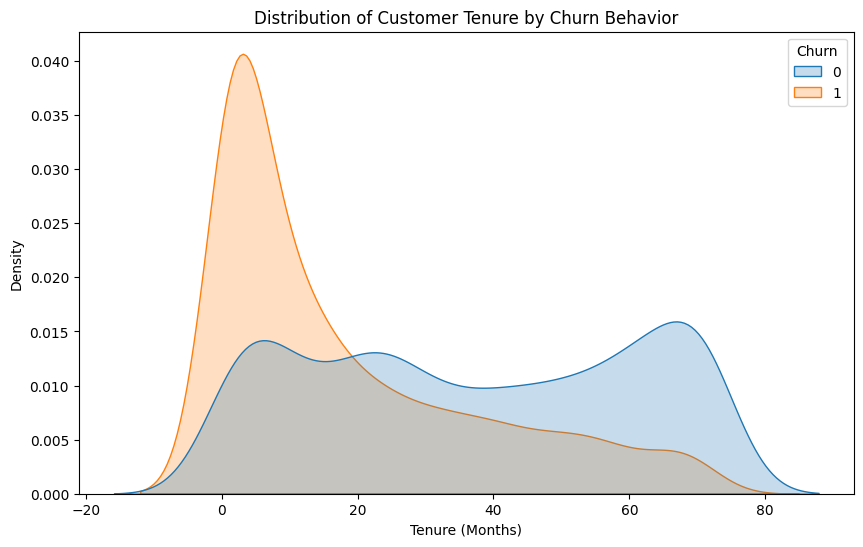

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=balanced_data, x='tenure', hue='Churn', fill=True, common_norm=False)
plt.title('Distribution of Customer Tenure by Churn Behavior')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.show()

The plot shows the distribution of customer tenure (in months) colored by churn behavior (churned vs. not churned). The x-axis represents tenure, and the y-axis represents the density of customers.
The distribution of customer tenure is higher in the lower tenure range (fewer months) and tapers off as tenure increases.
The distribution of customer tenure is higher in the lower tenure range (fewer months) and tapers off as tenure increases. This suggests that there is a significant number of customers with relatively short tenures.This indicates that customers are more likely to churn shortly after starting their subscription.As tenure increases, the density of non-churned (stable) customers becomes higher, indicating that customers are more likely to stay with the service as they continue their subscription.


**6.	Customer Satisfaction Analysis:** the relationship between customer satisfaction and churn.

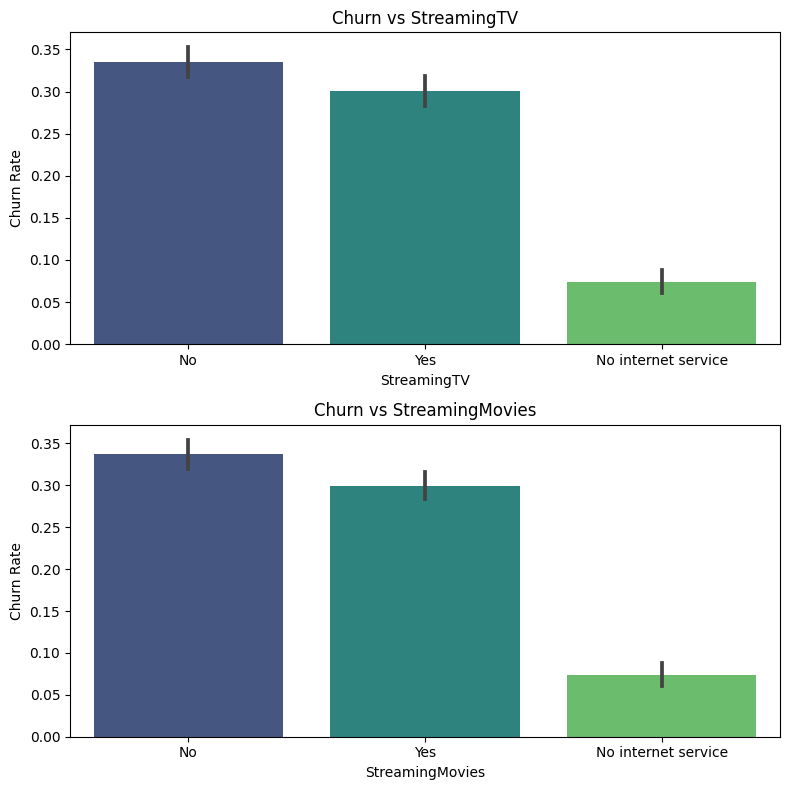

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Telco-Customer-Churn.csv")
# Convert 'Churn' column to numeric
df_a['Churn'] = df_a['Churn'].map({'Yes': 1, 'No': 0})

# Select proxy factors and the 'Churn' column
proxy_columns = ['StreamingTV', 'StreamingMovies', 'Churn']
filtered_df = df_a[proxy_columns]

# Set up subplots for visualizations
num_plots = len(proxy_columns) - 1  # Excluding 'Churn'
plt.figure(figsize=(8, 4 * num_plots))

for i, column in enumerate(proxy_columns[:-1], start=1):
    plt.subplot(num_plots, 1, i)
    sns.barplot(x=column, y='Churn', data=filtered_df, palette='viridis')
    plt.title(f'Churn vs {column}')
    plt.xlabel(column)
    plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()


The "Churn vs StreamingTV" plot shows that customers who have StreamingTV tend to have a slightly higher churn rate compared to those who do not.
The "Churn vs StreamingMovies" plot displays a similar pattern, where customers with StreamingMovies also exhibit a slightly higher churn rate.

While these plots suggest a potential correlation between streaming services and churn, it's important to consider other factors that could be contributing to churn.
Customer satisfaction might be influenced by factors beyond streaming services, such as pricing, customer support, service quality, and contract terms.

**7.	Customer Lifetime Value:** Calculate the lifetime value of customers based on their tenure and total charges.

In [32]:
# Filter out rows with zero tenure
filtered_data = balanced_data[(balanced_data['tenure'] > 0) & (balanced_data['TotalCharges'] >= 0)]

# Calculate average monthly revenue per customer
filtered_data['MonthlyRevenue'] = filtered_data['TotalCharges'] / filtered_data['tenure']

# Calculate average customer lifespan (tenure) in months
average_lifespan = filtered_data['tenure'].mean()

# Calculate Customer Lifetime Value (CLV)
clv = filtered_data['MonthlyRevenue'].mean() * average_lifespan

print("Average Monthly Revenue per Customer: ${:.2f}".format(filtered_data['MonthlyRevenue'].mean()))
print("Average Customer Lifespan (Tenure): {:.2f} months".format(average_lifespan))
print("Customer Lifetime Value (CLV): ${:.2f}".format(clv))




Average Monthly Revenue per Customer: $67.85
Average Customer Lifespan (Tenure): 27.67 months
Customer Lifetime Value (CLV): $1877.17


The codefilters out rows with zero tenure and calculates the average monthly revenue per customer, average customer lifespan, and customer lifetime value.

**8.	Customer Demographics and Churn:** Analyze how customer demographics (e.g., gender, SeniorCitizen, Dependents) influence churn

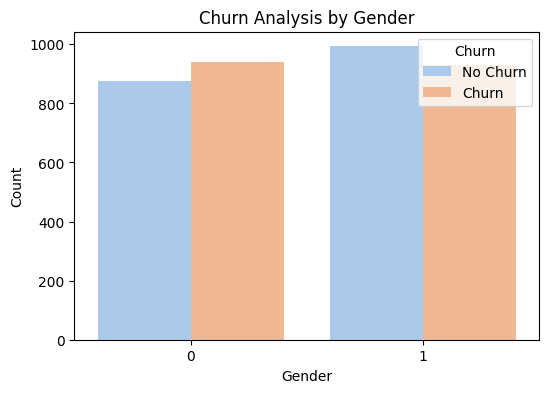

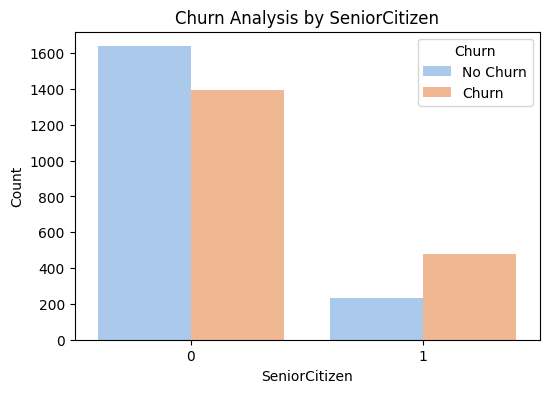

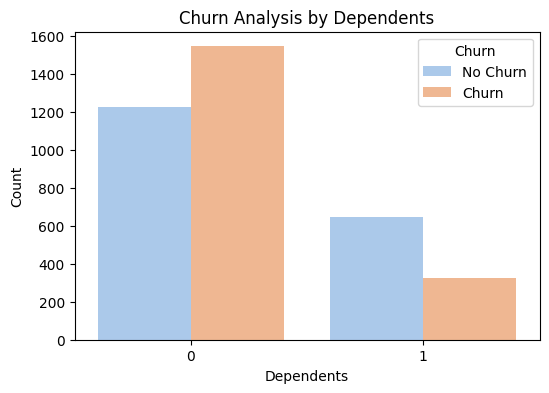

In [ ]:
#Analyze the influence of gender on churn
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Churn', data=balanced_data, palette='pastel')
plt.title('Churn Analysis by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

# Analyze the influence of SeniorCitizen on churn
plt.figure(figsize=(6, 4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=balanced_data, palette='pastel')
plt.title('Churn Analysis by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

# Analyze the influence of Dependents on churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Dependents', hue='Churn', data=balanced_data, palette='pastel')
plt.title('Churn Analysis by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

The "Churn Analysis by Gender" plot shows the distribution of churned and non-churned customers based on their gender.The churn distribution appears to be similar between male and female customers.
Gender alone may not be a significant factor influencing churn, as the proportions of churned and non-churned customers seem comparable for both genders.

The "Churn Analysis by SeniorCitizen" plot displays the churn distribution for senior citizens (1) and non-senior citizens (0).
Senior citizens seem to have a higher churn rate compared to non-senior citizens.

The "Churn Analysis by Dependents" plot shows the churn distribution for customers with dependents (Yes) and without dependents (No).


**9.	Billing Preferences and Churn:**Study the impact of paperless billing and payment methods on customer churn.

Churn Rates for PaperlessBilling
PaperlessBilling
0    0.355572
1    0.578752
Name: Churn, dtype: float64


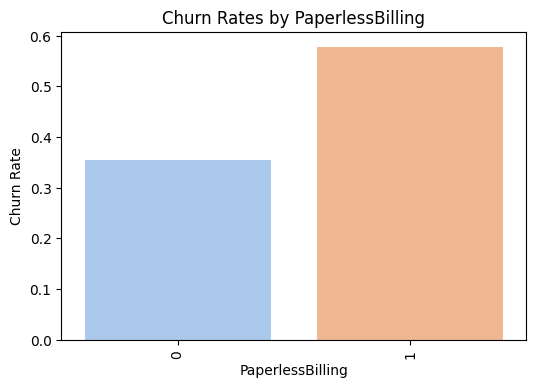

Churn Rates for PaymentMethod
PaymentMethod
0    0.364407
1    0.339678
2    0.689633
3    0.387909
Name: Churn, dtype: float64


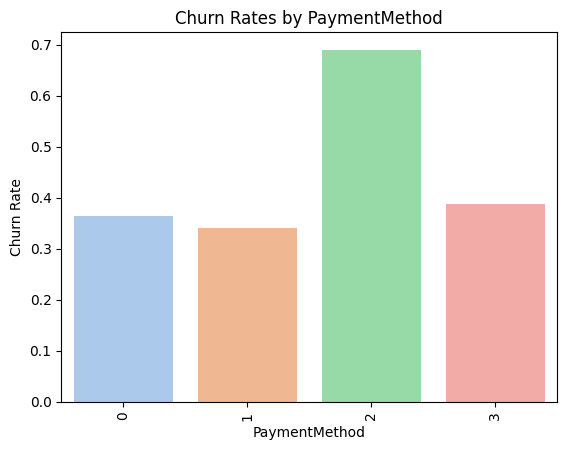

In [ ]:
# Convert 'Churn' column to numeric (0: No, 1: Yes)
balanced_data['Churn'] = pd.Categorical(balanced_data['Churn']).codes

categories = ['PaperlessBilling', 'PaymentMethod']
# Visualization: Bar plots of churn rates for different categories
plt.figure(figsize=(6, 4))
for col in categories:
    churn_rates = balanced_data.groupby(col)['Churn'].mean()
    print("Churn Rates for", col)
    print(churn_rates)
    sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
    plt.title('Churn Rates by {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=90)
    plt.show()

Customers with paperless billing tend to have a slightly higher churn rate compared to those without paperless billing.

In the above plot 'Churn Rates by PaymentMethod',0 indicates Bank transfer(automatic),
1 indicates credit card(automatic), 2 indicates Electronic check, 3 indicates Mailed check. Different payment methods have varying churn rates.Some payment methods might be associated with higher churn rates compared to others.

**10.	Monthly Charges and Churn:**Investigate how monthly charges affect customer churn.

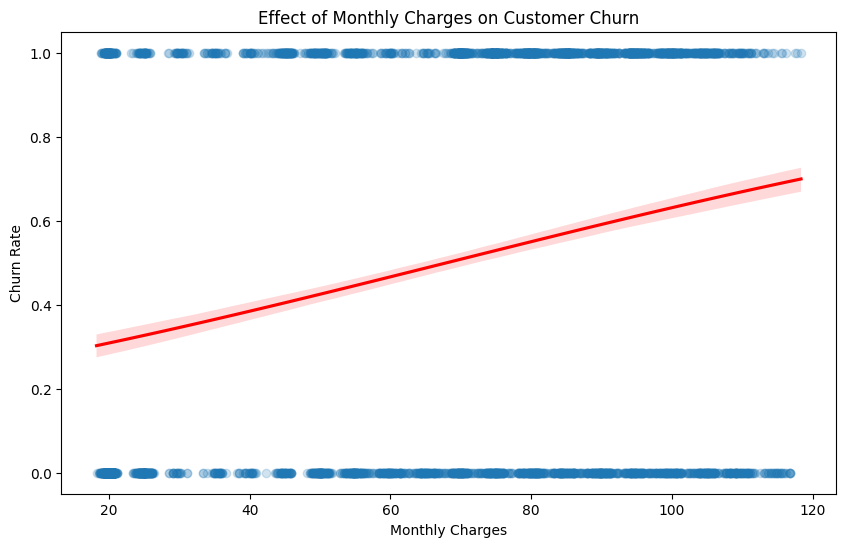

In [ ]:
# Visualization: Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='MonthlyCharges', y='Churn', data=balanced_data, logistic=True, scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Effect of Monthly Charges on Customer Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Rate')
plt.show()

The plot displays the effect of monthly charges on customer churn.
The red logistic regression line represents the best-fitting logistic curve that models the relationship between monthly charges and churn.
The curve helps visualize how changes in monthly charges relate to changes in the probability of churn.
At lower monthly charges, the churn rate is relatively lower, indicating that customers with lower charges are less likely to churn.
As monthly charges increase, the churn rate appears to rise, suggesting that higher charges might lead to an increased likelihood of churn.

If the regression line has a positive slope, it suggests that higher monthly charges might be associated with a higher likelihood of churn. Conversely, a negative slope indicates that higher charges are associated with lower churn rates.

**11.	Customer Retention Strategies:**Identify factors that are strongly associated with churn and develop retention strategies.

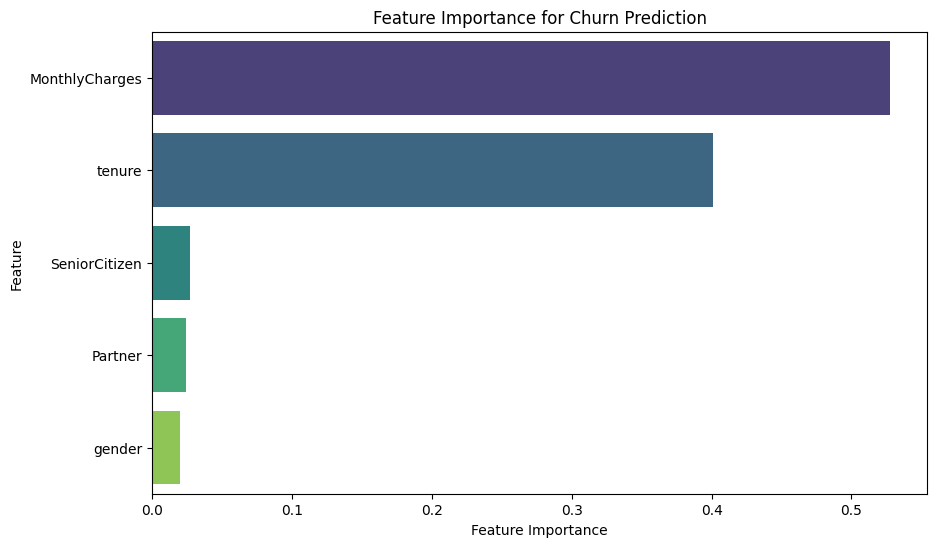

Top Factors Strongly Associated with Churn:
Index(['MonthlyCharges', 'tenure', 'SeniorCitizen', 'Partner', 'gender'], dtype='object')


In [ ]:
# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Top factors strongly associated with churn
top_factors = feature_importances.index[:5]  # Assuming top 5 factors
print("Top Factors Strongly Associated with Churn:")
print(top_factors)

The code initializes and trains a Random Forest classifier to predict churn based on the available features (X) and the target variable (y).The feature importances indicate the relative importance of each feature in predicting churn. Features with higher importance are considered more strongly associated with churn.

**12.	Comparative Analysis:** Compare churn rates and customer behavior between different service plans, internet services, etc.

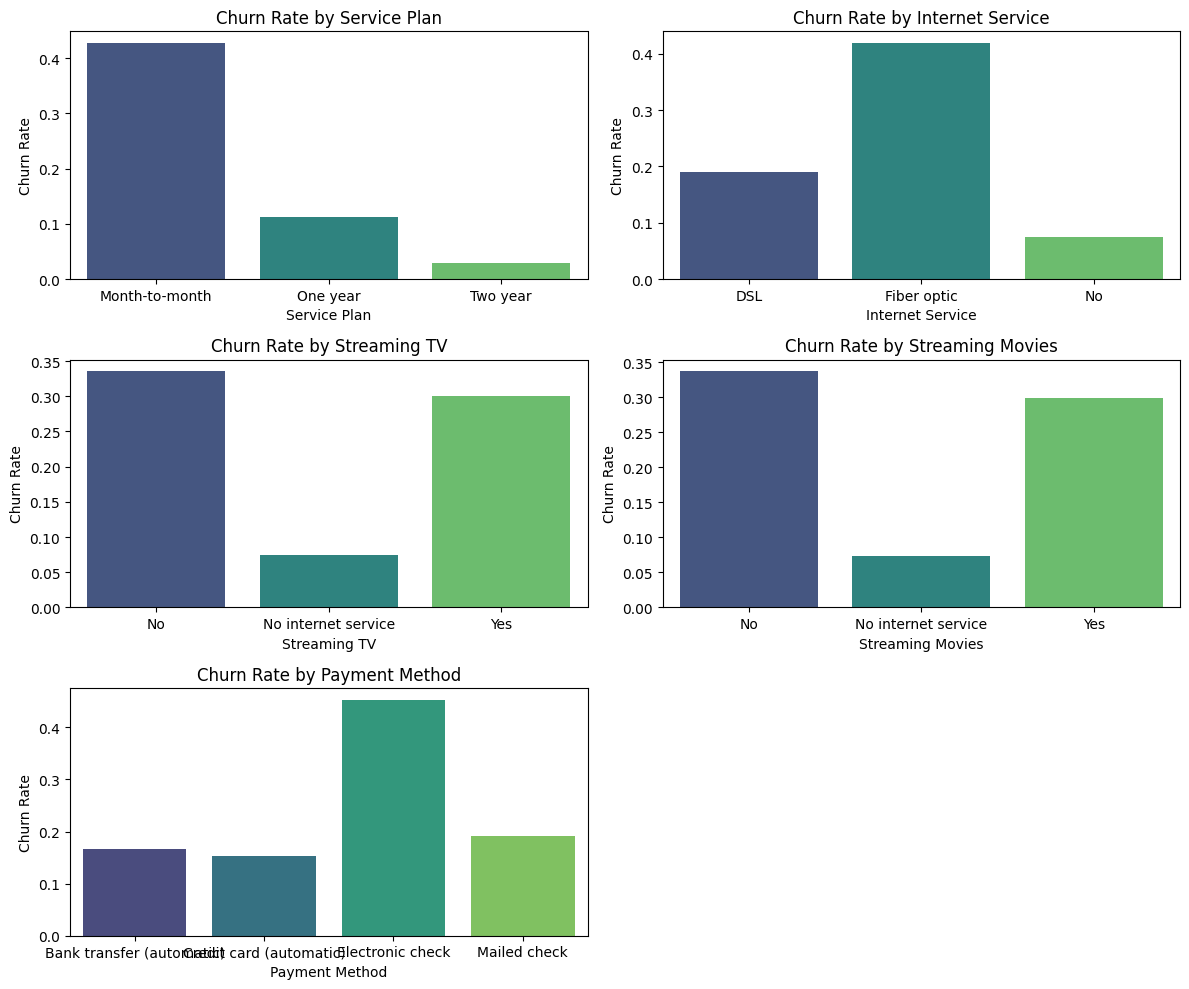

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

churn_mapping = {'Yes': 1, 'No': 0}
df['Churn'] = df['Churn'].map(churn_mapping)

# 1. Churn Rates by Service Plans
churn_by_contract = df.groupby('Contract')['Churn'].mean().reset_index()

# 2. Churn Rates by Internet Services
churn_by_internet = df.groupby('InternetService')['Churn'].mean().reset_index()

# 3. Churn Rates by Streaming Services
churn_by_streaming_tv = df.groupby('StreamingTV')['Churn'].mean().reset_index()
churn_by_streaming_movies = df.groupby('StreamingMovies')['Churn'].mean().reset_index()

# 4. Churn Rates by Payment Methods
churn_by_payment_method = df.groupby('PaymentMethod')['Churn'].mean().reset_index()

# Visualization
plt.figure(figsize=(12, 10))

# Subplot 1: Churn Rates by Service Plans
plt.subplot(3, 2, 1)
sns.barplot(x='Contract', y='Churn', data=churn_by_contract, palette='viridis')
plt.title('Churn Rate by Service Plan')
plt.xlabel('Service Plan')
plt.ylabel('Churn Rate')

# Subplot 2: Churn Rates by Internet Services
plt.subplot(3, 2, 2)
sns.barplot(x='InternetService', y='Churn', data=churn_by_internet, palette='viridis')
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate')

# Subplot 3: Churn Rates by Streaming Services
plt.subplot(3, 2, 3)
sns.barplot(x='StreamingTV', y='Churn', data=churn_by_streaming_tv, palette='viridis')
plt.title('Churn Rate by Streaming TV')
plt.xlabel('Streaming TV')
plt.ylabel('Churn Rate')

plt.subplot(3, 2, 4)
sns.barplot(x='StreamingMovies', y='Churn', data=churn_by_streaming_movies, palette='viridis')
plt.title('Churn Rate by Streaming Movies')
plt.xlabel('Streaming Movies')
plt.ylabel('Churn Rate')

# Subplot 4: Churn Rates by Payment Methods
plt.subplot(3, 2, 5)
sns.barplot(x='PaymentMethod', y='Churn', data=churn_by_payment_method, palette='viridis')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()


Customers on "Month-to-month" service plans have a significantly higher churn rate compared to those on "One year" or "Two year" plans.

Customers with "Fiber optic" internet service have a higher churn rate compared to those with "DSL" or "No" internet service.

Customers with "No" streaming TV or streaming movies have slightly lower churn rates compared to those with these services.

Customers using "Electronic check" as the payment method have a higher churn rate compared to other payment methods.



Here are the key insights drawn from your analysis

Customers with certain service combinations, such as having Fiber optic internet service and streaming TV/movies, tend to have higher churn rates. This suggests that improving the quality and value of these services could help retain customers.

Customers with month-to-month contracts have a higher likelihood of churning compared to those with one-year or two-year contracts. Encouraging longer-term contracts or providing incentives for renewals could contribute to reduced churn.

New customers and those with very long tenures are more likely to churn. This highlights the importance of engaging and providing value to new customers and addressing concerns of long-standing customers.

Senior citizens and customers without dependents tend to have higher churn rates. Tailoring services or offers to address the needs and preferences of these segments might help retain more customers.

The analysis using the Random Forest model indicates that features like contract type, tenure, and monthly charges are strong predictors of churn. Strategies aimed at improving these factors can have a significant impact on reducing churn.

Different service plans, internet services, streaming services, and payment methods have varying churn rates. Targeted approaches such as offering promotions for certain plans or improving payment options can contribute to lower churn.

